In [1]:
import pandas as pd

Вопрос: растет ли температура в Бордо и влияет ли она на оценки?

In [3]:
file = 'temperature_and_score.xlsx'
xl = pd.ExcelFile(file)
df = xl.parse('Sheet1')
df.head()

,Unnamed: 0,date,max,min,average,wind,rain,effect_t,year,month,margaux,pauillac,graves,pomerol,emilion
0,0,1973-01-01,3.0,-3.0,-0.3,2.0,0.0,-3.2,1973,1,NaN,NaN,NaN,NaN,NaN
1,1,1973-01-02,9.0,0.0,4.7,2.0,1.0,2.3,1973,1,NaN,NaN,NaN,NaN,NaN
2,2,1973-01-03,15.0,-3.0,4.8,3.0,0.0,1.5,1973,1,NaN,NaN,NaN,NaN,NaN
3,3,1973-01-04,15.0,0.0,7.8,2.0,0.0,5.7,1973,1,NaN,NaN,NaN,NaN,NaN
4,4,1973-01-05,23.0,13.0,16.2,4.0,1.0,14.6,1973,1,NaN,NaN,NaN,NaN,NaN


In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17122 entries, 0 to 17121
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      17122 non-null  datetime64[ns]
 1   max       17121 non-null  float64       
 2   min       17079 non-null  float64       
 3   average   17122 non-null  float64       
 4   wind      17121 non-null  float64       
 5   rain      17095 non-null  float64       
 6   effect_t  17049 non-null  float64       
 7   year      17122 non-null  int64         
 8   month     17122 non-null  int64         
 9   margaux   15303 non-null  float64       
 10  pauillac  15303 non-null  float64       
 11  graves    15303 non-null  float64       
 12  pomerol   15303 non-null  float64       
 13  emilion   15303 non-null  float64       
dtypes: datetime64[ns](1), float64(11), int64(2)
memory usage: 1.8 MB


In [6]:
df.head()

,date,max,min,average,wind,rain,effect_t,year,month,margaux,pauillac,graves,pomerol,emilion
0,1973-01-01,3.0,-3.0,-0.3,2.0,0.0,-3.2,1973,1,NaN,NaN,NaN,NaN,NaN
1,1973-01-02,9.0,0.0,4.7,2.0,1.0,2.3,1973,1,NaN,NaN,NaN,NaN,NaN
2,1973-01-03,15.0,-3.0,4.8,3.0,0.0,1.5,1973,1,NaN,NaN,NaN,NaN,NaN
3,1973-01-04,15.0,0.0,7.8,2.0,0.0,5.7,1973,1,NaN,NaN,NaN,NaN,NaN
4,1973-01-05,23.0,13.0,16.2,4.0,1.0,14.6,1973,1,NaN,NaN,NaN,NaN,NaN


In [7]:
df_year = df.set_index('date')

In [8]:
df_month = df.set_index('date')

In [12]:
df_year = df_year.resample('1Y').mean()

In [13]:
df_month = df_month.resample('MS').mean()

In [14]:
df_year.head()

,max,min,average,wind,rain,effect_t,year,month,margaux,pauillac,graves,pomerol,emilion
date,,,,,,,,,,,,,
1973-12-31,17.479452,6.802740,11.924658,2.961644,2.213699,10.295879,1973.0,6.526027,NaN,NaN,NaN,NaN,NaN
1974-12-31,17.553425,7.408219,12.463836,3.309589,2.665753,10.447123,1974.0,6.526027,NaN,NaN,NaN,NaN,NaN
1975-12-31,17.815427,7.365385,12.406593,3.074176,2.179063,10.537088,1975.0,6.530220,78.0,89.0,89.0,94.0,85.0
1976-12-31,18.352459,7.485792,12.718852,2.939891,3.617486,10.944262,1976.0,6.513661,77.0,84.0,71.0,82.0,82.0
1977-12-31,18.298630,8.043836,12.301096,3.200000,2.512329,10.410685,1977.0,6.526027,NaN,NaN,NaN,NaN,NaN


In [15]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 1973-12-31 to 2019-12-31
Freq: A-DEC
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   max       47 non-null     float64
 1   min       47 non-null     float64
 2   average   47 non-null     float64
 3   wind      47 non-null     float64
 4   rain      47 non-null     float64
 5   effect_t  47 non-null     float64
 6   year      47 non-null     float64
 7   month     47 non-null     float64
 8   margaux   42 non-null     float64
 9   pauillac  42 non-null     float64
 10  graves    42 non-null     float64
 11  pomerol   42 non-null     float64
 12  emilion   42 non-null     float64
dtypes: float64(13)
memory usage: 5.1 KB


In [16]:
df_month.head()

,max,min,average,wind,rain,effect_t,year,month,margaux,pauillac,graves,pomerol,emilion
date,,,,,,,,,,,,,
1973-01-01,12.774194,3.548387,8.354839,3.516129,6.322581,5.751613,1973,1,NaN,NaN,NaN,NaN,NaN
1973-02-01,11.857143,3.607143,7.592857,3.857143,3.678571,4.567857,1973,2,NaN,NaN,NaN,NaN,NaN
1973-03-01,15.322581,2.903226,9.025806,2.709677,1.000000,6.706452,1973,3,NaN,NaN,NaN,NaN,NaN
1973-04-01,18.066667,5.933333,11.800000,3.133333,0.500000,9.686667,1973,4,NaN,NaN,NaN,NaN,NaN
1973-05-01,21.838710,10.290323,15.851613,3.258065,1.645161,14.493548,1973,5,NaN,NaN,NaN,NaN,NaN


In [17]:
df_month.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 564 entries, 1973-01-01 to 2019-12-01
Freq: MS
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   max       564 non-null    float64
 1   min       564 non-null    float64
 2   average   564 non-null    float64
 3   wind      564 non-null    float64
 4   rain      564 non-null    float64
 5   effect_t  564 non-null    float64
 6   year      564 non-null    int64  
 7   month     564 non-null    int64  
 8   margaux   504 non-null    float64
 9   pauillac  504 non-null    float64
 10  graves    504 non-null    float64
 11  pomerol   504 non-null    float64
 12  emilion   504 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 61.7 KB


In [18]:
df_year.dropna(inplace = True)

In [20]:
df_month.dropna(inplace = True)

In [21]:
df_year.head()

,max,min,average,wind,rain,effect_t,year,month,margaux,pauillac,graves,pomerol,emilion
date,,,,,,,,,,,,,
1975-12-31,17.815427,7.365385,12.406593,3.074176,2.179063,10.537088,1975.0,6.530220,78.0,89.0,89.0,94.0,85.0
1976-12-31,18.352459,7.485792,12.718852,2.939891,3.617486,10.944262,1976.0,6.513661,77.0,84.0,71.0,82.0,82.0
1978-12-31,18.479452,7.495616,12.118630,3.435616,2.575342,9.978356,1978.0,6.526027,87.0,87.0,88.0,84.0,84.0
1979-12-31,16.824658,7.961644,12.256712,3.126374,3.383562,10.356044,1979.0,6.526027,87.0,85.0,88.0,86.0,84.0
1980-12-31,16.562842,7.464481,11.840710,3.155738,2.830601,9.877596,1980.0,6.513661,79.0,78.0,78.0,79.0,72.0


In [22]:
df_month.head()

,max,min,average,wind,rain,effect_t,year,month,margaux,pauillac,graves,pomerol,emilion
date,,,,,,,,,,,,,
1975-01-01,15.433333,6.290323,10.877419,4.225806,2.967742,7.993548,1975,1,78.0,89.0,89.0,94.0,85.0
1975-02-01,16.285714,4.178571,9.985714,2.714286,2.214286,7.703571,1975,2,78.0,89.0,89.0,94.0,85.0
1975-03-01,13.419355,3.419355,8.354839,3.354839,2.064516,5.529032,1975,3,78.0,89.0,89.0,94.0,85.0
1975-04-01,18.800000,7.700000,12.753333,3.366667,1.800000,10.533333,1975,4,78.0,89.0,89.0,94.0,85.0
1975-05-01,18.466667,7.966667,13.446667,2.766667,1.633333,11.880000,1975,5,78.0,89.0,89.0,94.0,85.0


In [23]:
df_month.to_excel('df_month.xlsx')
df_year.to_excel('df_year.xlsx')

Проверим нормальность распределения

In [27]:
col = df_year.columns
col

Index(['max', 'min', 'average', 'wind', 'rain', 'effect_t', 'year', 'month',
       'margaux', 'pauillac', 'graves', 'pomerol', 'emilion'],
      dtype='object')

In [28]:
regions = ['margaux', 'pauillac', 'graves', 'pomerol', 'emilion']
weather = ['max', 'min', 'average', 'wind', 'rain', 'effect_t']

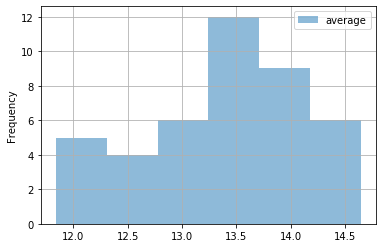

In [34]:
df_year[['average']].plot(bins = 6, kind = 'hist', alpha = 0.5, grid = True)

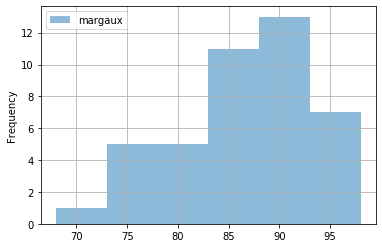

In [35]:
df_year[['margaux']].plot(bins = 6, kind = 'hist', alpha = 0.5, grid = True)

C большой вероятностью распределение нормальное. Проверим с помощью теста Шапиро-Уилка. Нулевая гипотеза H0 теста Шапиро–Уилка заключается в том, что случайная величина, распределена по нормальному закону. Если p-value больше 0.05, то принимаем нулевую гипотезу.

In [39]:
from scipy import stats

In [42]:
for item in weather:
    
    result = stats.shapiro(df_year[item])
    if result[1] > 0.05:
        print(f'Распределение нормальное для {item}, p-value = ', result[1])

Распределение нормальное для max, p-value =  0.45450934767723083
Распределение нормальное для min, p-value =  0.22772099077701569
Распределение нормальное для average, p-value =  0.2917545437812805
Распределение нормальное для rain, p-value =  0.5199277997016907
Распределение нормальное для effect_t, p-value =  0.6110158562660217


In [43]:
for region in regions:
    
    result = stats.shapiro(df_year[region])
    if result[1] > 0.05:
        print(f'Распределение нормальное для {region}, p-value = ', result[1])

Распределение нормальное для margaux, p-value =  0.06939700245857239
Распределение нормальное для pauillac, p-value =  0.2801799178123474


Поделим данные на 4 квартиля

In [46]:
df_year['q'] = pd.qcut(x = df_year['year'], q = 4, labels = [1,2,3,4])

In [47]:
df_year.head()

,max,min,average,wind,rain,effect_t,year,month,margaux,pauillac,graves,pomerol,emilion,q
date,,,,,,,,,,,,,,
1975-12-31,17.815427,7.365385,12.406593,3.074176,2.179063,10.537088,1975.0,6.530220,78.0,89.0,89.0,94.0,85.0,1
1976-12-31,18.352459,7.485792,12.718852,2.939891,3.617486,10.944262,1976.0,6.513661,77.0,84.0,71.0,82.0,82.0,1
1978-12-31,18.479452,7.495616,12.118630,3.435616,2.575342,9.978356,1978.0,6.526027,87.0,87.0,88.0,84.0,84.0,1
1979-12-31,16.824658,7.961644,12.256712,3.126374,3.383562,10.356044,1979.0,6.526027,87.0,85.0,88.0,86.0,84.0,1
1980-12-31,16.562842,7.464481,11.840710,3.155738,2.830601,9.877596,1980.0,6.513661,79.0,78.0,78.0,79.0,72.0,1


In [61]:
df_year.query('q == 1')

,max,min,average,wind,rain,effect_t,year,month,margaux,pauillac,graves,pomerol,emilion,q
date,,,,,,,,,,,,,,
1975-12-31,17.815427,7.365385,12.406593,3.074176,2.179063,10.537088,1975.0,6.530220,78.0,89.0,89.0,94.0,85.0,1
1976-12-31,18.352459,7.485792,12.718852,2.939891,3.617486,10.944262,1976.0,6.513661,77.0,84.0,71.0,82.0,82.0,1
1978-12-31,18.479452,7.495616,12.118630,3.435616,2.575342,9.978356,1978.0,6.526027,87.0,87.0,88.0,84.0,84.0,1
1979-12-31,16.824658,7.961644,12.256712,3.126374,3.383562,10.356044,1979.0,6.526027,87.0,85.0,88.0,86.0,84.0,1
1980-12-31,16.562842,7.464481,11.840710,3.155738,2.830601,9.877596,1980.0,6.513661,79.0,78.0,78.0,79.0,72.0,1
1981-12-31,17.723288,8.350685,12.892055,3.189041,2.624658,11.089863,1981.0,6.526027,82.0,85.0,84.0,86.0,82.0,1
1982-12-31,18.328219,8.589589,13.287671,3.084932,3.547945,11.599452,1982.0,6.526027,86.0,98.0,88.0,96.0,94.0,1
1983-12-31,18.241370,8.287671,12.934521,3.095890,2.950685,11.229315,1983.0,6.526027,95.0,86.0,89.0,90.0,89.0,1
1984-12-31,17.384153,7.481148,12.316667,3.218579,3.628415,10.284426,1984.0,6.513661,68.0,72.0,79.0,65.0,65.0,1


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

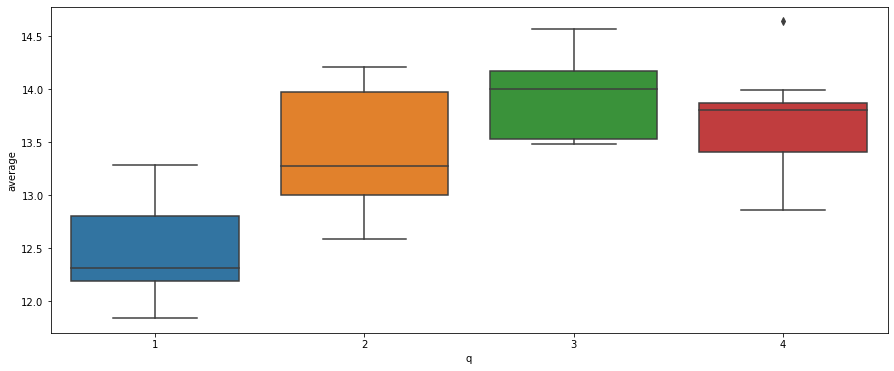

In [58]:
fig, ax = plt.subplots(figsize = (15,6))

sns.boxplot(df_year['q'], df_year['average'])

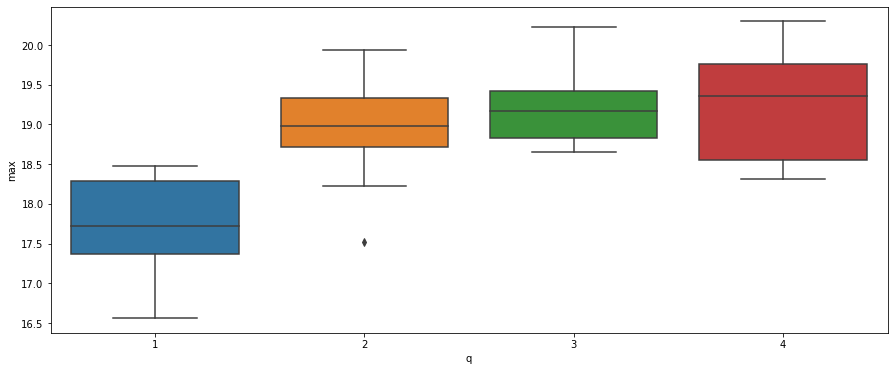

In [59]:
fig, ax = plt.subplots(figsize = (15,6))

sns.boxplot(df_year['q'], df_year['max'])

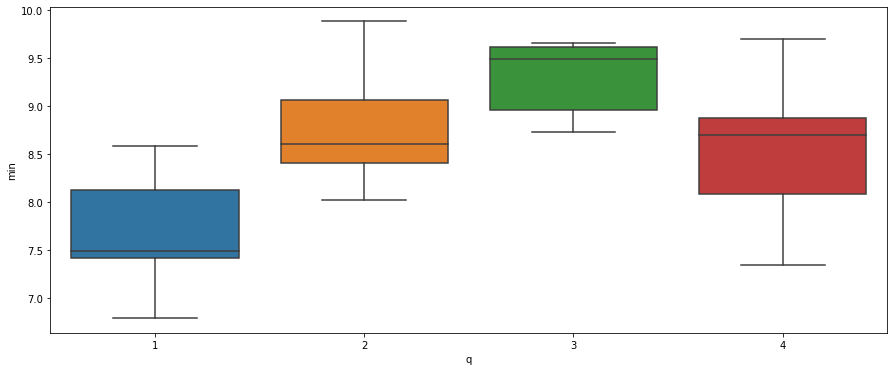

In [60]:
fig, ax = plt.subplots(figsize = (15,6))

sns.boxplot(df_year['q'], df_year['min'])

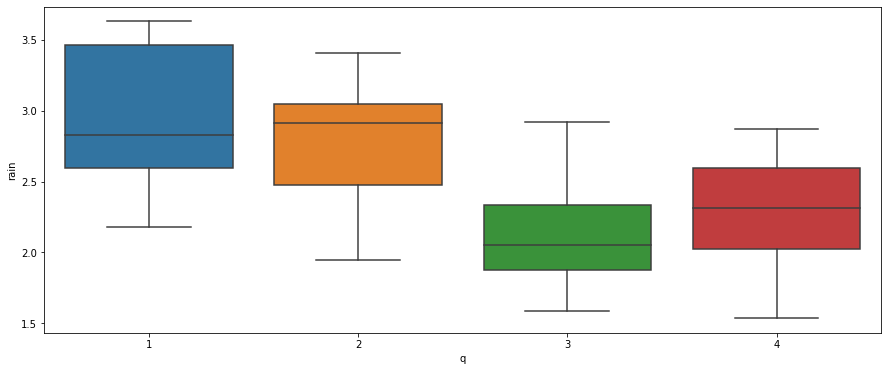

In [64]:
fig, ax = plt.subplots(figsize = (15,6))

sns.boxplot(df_year['q'], df_year['rain'])

Температура выросла в среднем на 2 градуса, количество осадков снизилось на 1 мм 

Проверяем гомоскедастичность выборки

In [67]:
for item in weather:
    q1 = df_year.query('q == 1')
    q2 = df_year.query('q == 2')
    q3 = df_year.query('q == 3')
    q4 = df_year.query('q == 4')
    result = stats.levene(q1[item], q2[item], q3[item], q4[item])
    if result[1] > 0.05:
        print(f'Распределение гомоскедастичное для {item}, p-value = ', result[1])

Распределение гомоскедастичное для max, p-value =  0.7376368014461967
Распределение гомоскедастичное для min, p-value =  0.7324605454534268
Распределение гомоскедастичное для average, p-value =  0.7716622350135195
Распределение гомоскедастичное для wind, p-value =  0.4373027938571382
Распределение гомоскедастичное для rain, p-value =  0.9458921928068449
Распределение гомоскедастичное для effect_t, p-value =  0.9856115086037563


In [69]:
for region in regions:
    q1 = df_year.query('q == 1')
    q2 = df_year.query('q == 2')
    q3 = df_year.query('q == 3')
    q4 = df_year.query('q == 4')
    result = stats.levene(q1[region], q2[region], q3[region], q4[region])
    if result[1] > 0.05:
        print(f'Распределение гомоскедастичное для {region}, p-value = ', result[1])

Распределение гомоскедастичное для margaux, p-value =  0.42063306080133356
Распределение гомоскедастичное для pauillac, p-value =  0.23106498357033636
Распределение гомоскедастичное для graves, p-value =  0.8946216867506944
Распределение гомоскедастичное для pomerol, p-value =  0.5616968432111809
Распределение гомоскедастичное для emilion, p-value =  0.3633809113434093


In [85]:
for item in weather:
    q1 = df_year.query('q == 1')
    q2 = df_year.query('q == 2')
    q3 = df_year.query('q == 3')
    q4 = df_year.query('q == 4')
    result = stats.f_oneway(q1[item], q2[item], q3[item], q4[item])
    print(f'{item}', result)

max F_onewayResult(statistic=14.140948909730833, pvalue=2.4236597388718206e-06)
min F_onewayResult(statistic=16.154486418847036, pvalue=6.293588519363005e-07)
average F_onewayResult(statistic=19.759095548807178, pvalue=6.968991587177516e-08)
wind F_onewayResult(statistic=5.594597983922674, pvalue=0.002803410040257195)
rain F_onewayResult(statistic=7.1202519784654275, pvalue=0.0006544975216141912)
effect_t F_onewayResult(statistic=13.794137261976596, pvalue=3.0873426673965986e-06)


Для всех погодных изменений различия существенны.

In [86]:
for region in regions:
    q1 = df_year.query('q == 1')
    q2 = df_year.query('q == 2')
    q3 = df_year.query('q == 3')
    q4 = df_year.query('q == 4')
    result = stats.f_oneway(q1[region], q2[region], q3[region], q4[region])
    print(f'{region}', result)

margaux F_onewayResult(statistic=4.949647067969018, pvalue=0.005349879841900065)
pauillac F_onewayResult(statistic=2.082724693551321, pvalue=0.118676012323904)
graves F_onewayResult(statistic=4.44866126769168, pvalue=0.008956580434730207)
pomerol F_onewayResult(statistic=2.2845429127712436, pvalue=0.09443561463583638)
emilion F_onewayResult(statistic=4.090945694202313, pvalue=0.01303350881481871)


Для margaux, graves, emilion различия существенны.

In [80]:
import statsmodels.api as sm

In [82]:
year_model = sm.OLS(df_year['margaux'], df_year['average']).fit()
year_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                margaux   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              7603.
Date:                Fri, 08 May 2020   Prob (F-statistic):                    3.53e-48
Time:                        13:11:03   Log-Likelihood:                         -137.14
No. Observations:                  42   AIC:                                      276.3
Df Residuals:                      41   BIC:                                      278.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
average        6.4489      0.074     87.195      0.000       6.300       6.598
==============================================================================
Omnibus:                        1.319   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.517   Jarque-Bera (JB):                1.104
Skew:                           0.186   Prob(JB):                        0.576
Kurtosis:                       2.298   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
year_model = sm.OLS(df_year['margaux'], df_year['rain']).fit()
year_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                margaux   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                              584.9
Date:                Fri, 08 May 2020   Prob (F-statistic):                    6.92e-26
Time:                        13:11:46   Log-Likelihood:                         -189.69
No. Observations:                  42   AIC:                                      381.4
Df Residuals:                      41   BIC:                                      383.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rain          32.1580      1.330     24.185      0.000      29.473      34.843
==============================================================================
Omnibus:                        0.719   Durbin-Watson:                   0.983
Prob(Omnibus):                  0.698   Jarque-Bera (JB):                0.680
Skew:                          -0.286   Prob(JB):                        0.712
Kurtosis:                       2.754   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
year_model = sm.OLS(df_year['margaux'], df_year['max']).fit()
year_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                margaux   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              7460.
Date:                Fri, 08 May 2020   Prob (F-statistic):                    5.20e-48
Time:                        13:11:56   Log-Likelihood:                         -137.54
No. Observations:                  42   AIC:                                      277.1
Df Residuals:                      41   BIC:                                      278.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
max            4.5959      0.053     86.371      0.000       4.488       4.703
==============================================================================
Omnibus:                        0.305   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.858   Jarque-Bera (JB):                0.476
Skew:                          -0.148   Prob(JB):                        0.788
Kurtosis:                       2.570   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
year_model = sm.OLS(df_year['margaux'], df_year['min']).fit()
year_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                margaux   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              3773.
Date:                Fri, 08 May 2020   Prob (F-statistic):                    5.48e-42
Time:                        13:21:20   Log-Likelihood:                         -151.74
No. Observations:                  42   AIC:                                      305.5
Df Residuals:                      41   BIC:                                      307.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
min           10.0294      0.163     61.426      0.000       9.700      10.359
==============================================================================
Omnibus:                        3.886   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                2.178
Skew:                           0.308   Prob(JB):                        0.336
Kurtosis:                       2.070   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
year_model = sm.OLS(df_year['margaux'], df_year['wind']).fit()
year_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                margaux   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              4804.
Date:                Fri, 08 May 2020   Prob (F-statistic):                    4.05e-44
Time:                        13:21:47   Log-Likelihood:                         -146.71
No. Observations:                  42   AIC:                                      295.4
Df Residuals:                      41   BIC:                                      297.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wind          26.5023      0.382     69.313      0.000      25.730      27.275
==============================================================================
Omnibus:                       11.978   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.367
Skew:                           0.853   Prob(JB):                     0.000460
Kurtosis:                       5.423   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

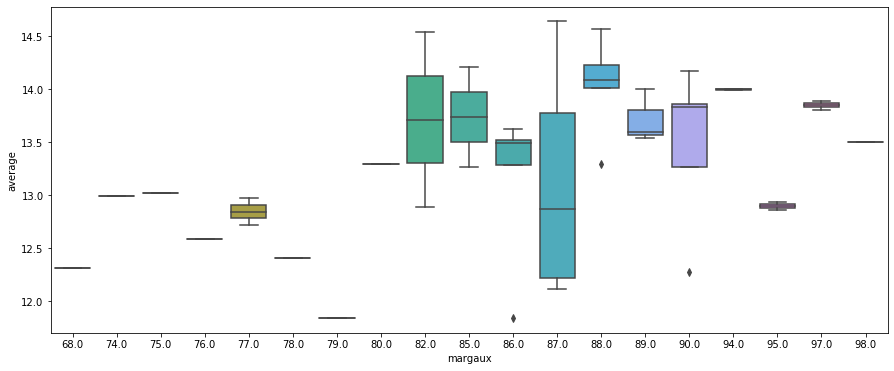

In [95]:
fig, ax = plt.subplots(figsize = (15,6))

sns.boxplot(df_year['margaux'], df_year['average'])

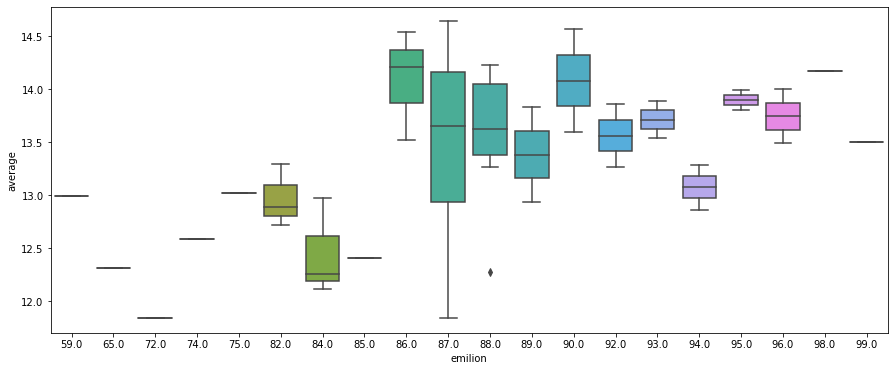

In [90]:
fig, ax = plt.subplots(figsize = (15,6))

sns.boxplot(df_year['emilion'], df_year['average'])

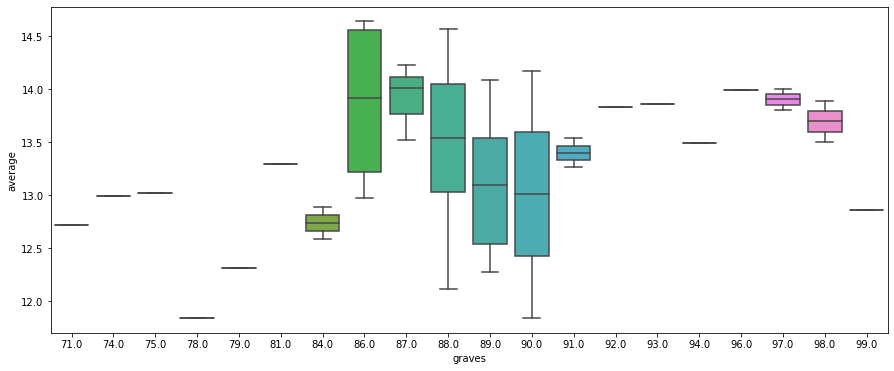

In [91]:
fig, ax = plt.subplots(figsize = (15,6))

sns.boxplot(df_year['graves'], df_year['average'])

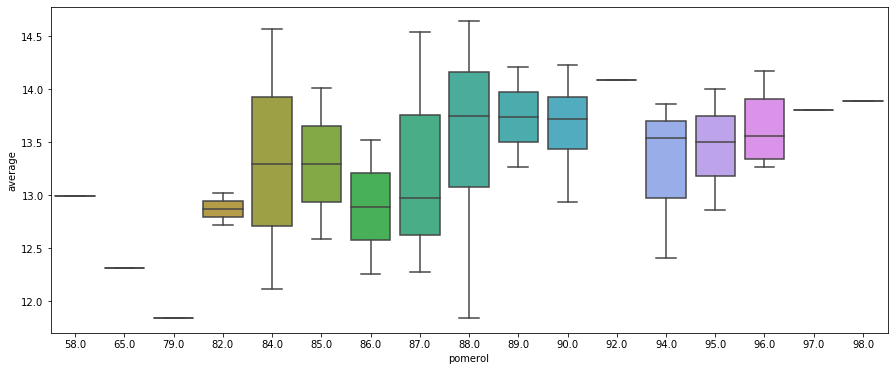

In [92]:
fig, ax = plt.subplots(figsize = (15,6))

sns.boxplot(df_year['pomerol'], df_year['average'])

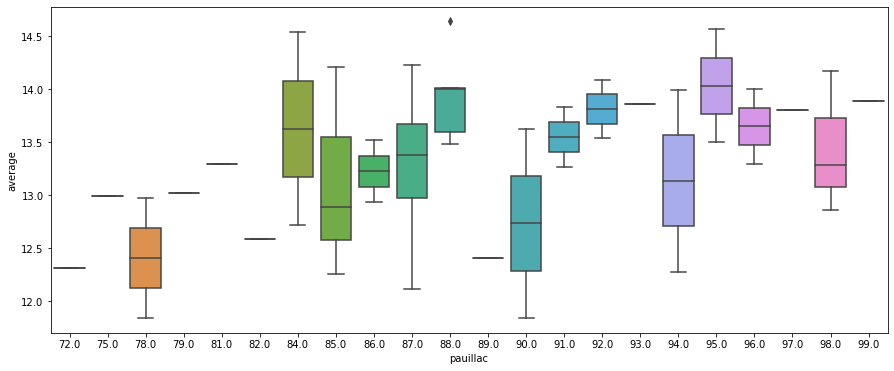

In [93]:
fig, ax = plt.subplots(figsize = (15,6))

sns.boxplot(df_year['pauillac'], df_year['average'])

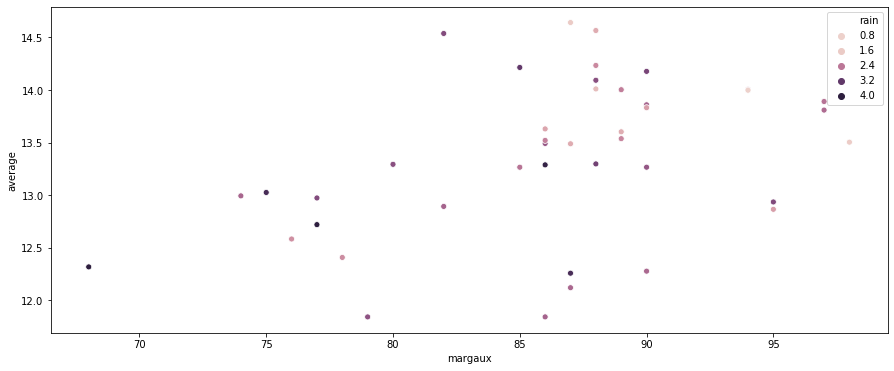

In [108]:
fig, ax = plt.subplots(figsize = (15,6))
sns.scatterplot(df_year['margaux'], df_year['average'], hue = df_year['rain'])

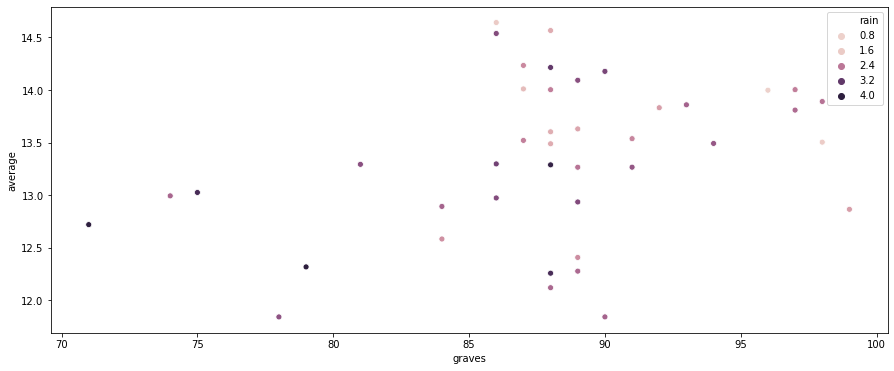

In [109]:
fig, ax = plt.subplots(figsize = (15,6))
sns.scatterplot(df_year['graves'], df_year['average'], hue = df_year['rain'])

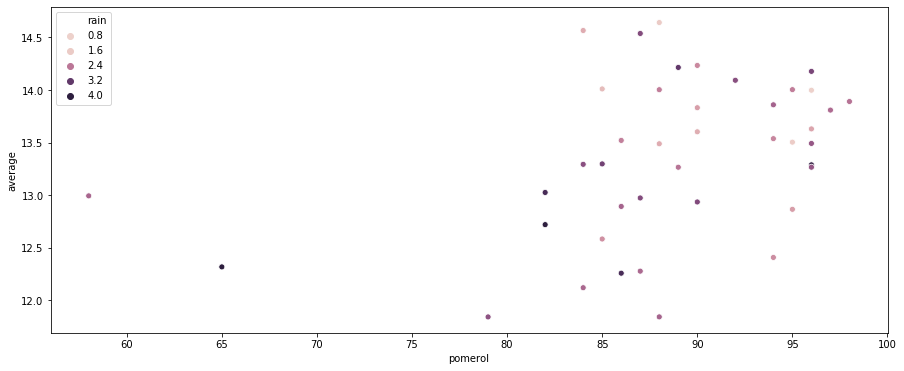

In [110]:
fig, ax = plt.subplots(figsize = (15,6))
sns.scatterplot(df_year['pomerol'], df_year['average'], hue = df_year['rain'])

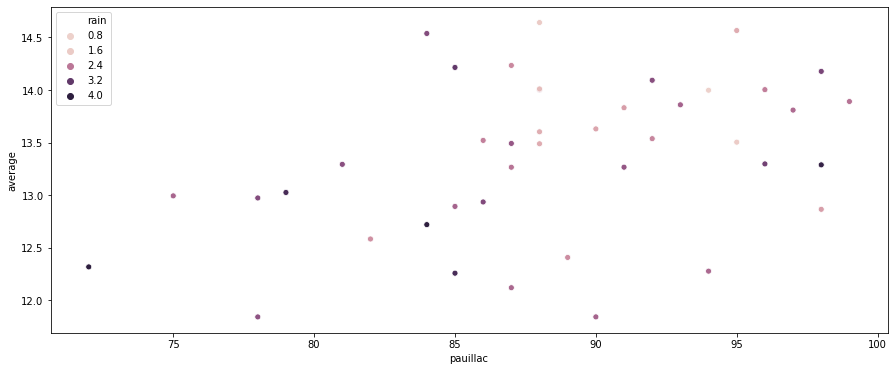

In [111]:
fig, ax = plt.subplots(figsize = (15,6))
sns.scatterplot(df_year['pauillac'], df_year['average'], hue = df_year['rain'])

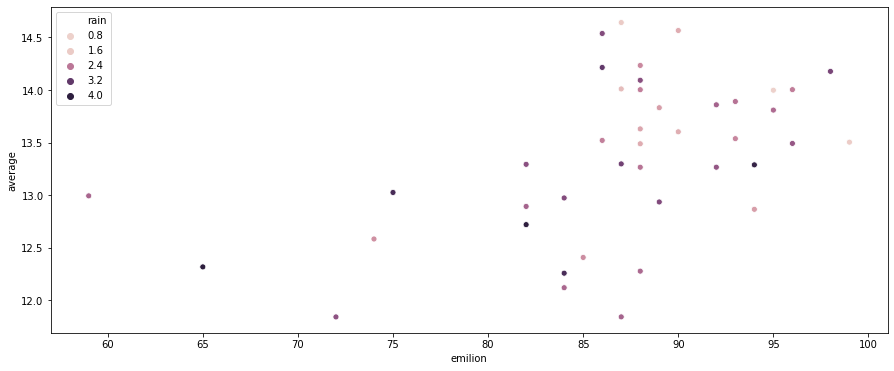

In [112]:
fig, ax = plt.subplots(figsize = (15,6))
sns.scatterplot(df_year['emilion'], df_year['average'], hue = df_year['rain'])

В ходе статистического анализа мы убедились, что квартильные выборки действительно различаются по погодным условиям и по оценкам. Причем есть зависимость между ростом температуры и ростом оценки.